# MSCS 634 - Advanced Data Mining for Data-Driven Insights and Predictive Modeling
## Deliverable 2: Regression Modeling and Performance Evaluation  
**Dataset:** Adult Income Dataset (Cleaned) - Obtained from Deliverable 1 

### Objective  
Develop regression models to predict a numeric target variable using feature engineering, model training, and performance evaluation techniques.

In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("adult_income_cleaned.csv")

# View structure and preview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18983 entries, 0 to 18982
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18983 non-null  int64 
 1   workclass       18983 non-null  object
 2   fnlwgt          18983 non-null  int64 
 3   education       18983 non-null  object
 4   education-num   18983 non-null  int64 
 5   marital-status  18983 non-null  object
 6   occupation      18983 non-null  object
 7   relationship    18983 non-null  object
 8   race            18983 non-null  object
 9   sex             18983 non-null  object
 10  capital-gain    18983 non-null  int64 
 11  capital-loss    18983 non-null  int64 
 12  hours-per-week  18983 non-null  int64 
 13  native-country  18983 non-null  object
 14  income          18983 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.2+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
1,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
2,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k
3,37,private,284582,masters,14,married-civ-spouse,exec-managerial,wife,white,female,0,0,40,united-states,<=50k
4,52,self-emp-not-inc,209642,hs-grad,9,married-civ-spouse,exec-managerial,husband,white,male,0,0,45,united-states,>50k


Summary statistics for hours-per-week:
count    18983.000000
mean        41.469841
std          3.950346
min         33.000000
25%         40.000000
50%         40.000000
75%         40.000000
max         52.000000
Name: hours-per-week, dtype: float64


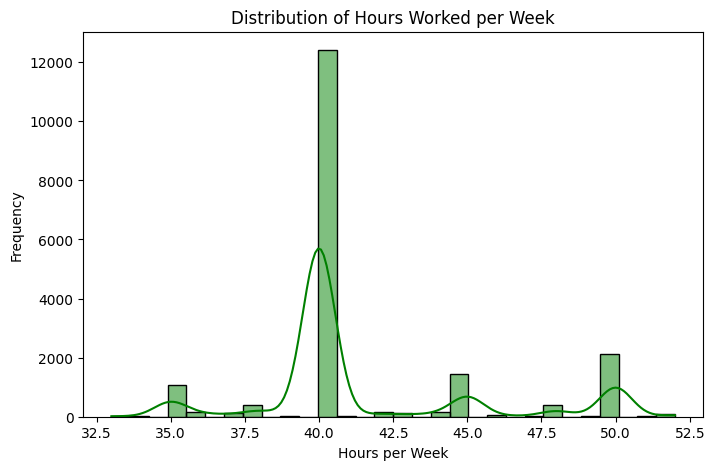

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define target variable(hours-per-week)
x = df.drop(columns=["hours-per-week"])
y = df["hours-per-week"]

# Perform feature engineering: identify categorical and numeric columns
categorical = x.select_dtypes(include="object").columns.tolist()
numerical = x.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Summary of the target variable
print("Summary statistics for hours-per-week:")
print(y.describe())

plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='green')
plt.title("Distribution of Hours Worked per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()

## Building models and evaluating models using metrics

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
])

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Dictionary to store results
predictions = {}
results = {}

# Train and evaluate models
for name, model in models.items():
    pipe = Pipeline([("preprocessor", preprocessor),("regressor", model)])
    
    # Fit and predict
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store results
    predictions[name] = y_pred
    results[name] = {"R2 Score": r2, "MSE": mse, "RMSE": rmse}
    print(f"{name} — R-squared: {r2:.4f}, Mean-Squared Error: {mse:.4f}, Root Meaned Squared Error (RSME): {rmse:.4f}")

# Store as DataFrame
results_df = pd.DataFrame(results).T

Linear Regression — R-squared: 0.1057, Mean-Squared Error: 14.1585, Root Meaned Squared Error (RSME): 3.7628
Ridge Regression — R-squared: 0.1061, Mean-Squared Error: 14.1523, Root Meaned Squared Error (RSME): 3.7620
Lasso Regression — R-squared: 0.0574, Mean-Squared Error: 14.9234, Root Meaned Squared Error (RSME): 3.8631


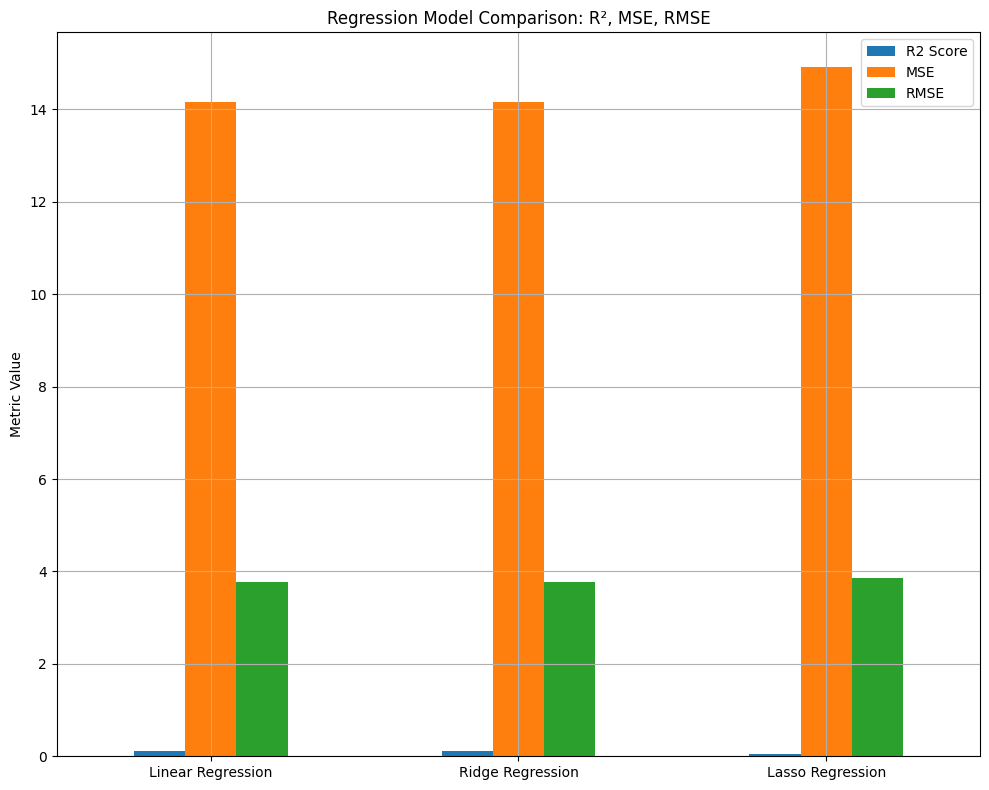

In [4]:
# Create DataFrame from results
metrics_df = pd.DataFrame(results).T

# Plot all metrics
metrics_df.plot(kind="bar", figsize=(10, 8))
plt.title("Regression Model Comparison: R², MSE, RMSE")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

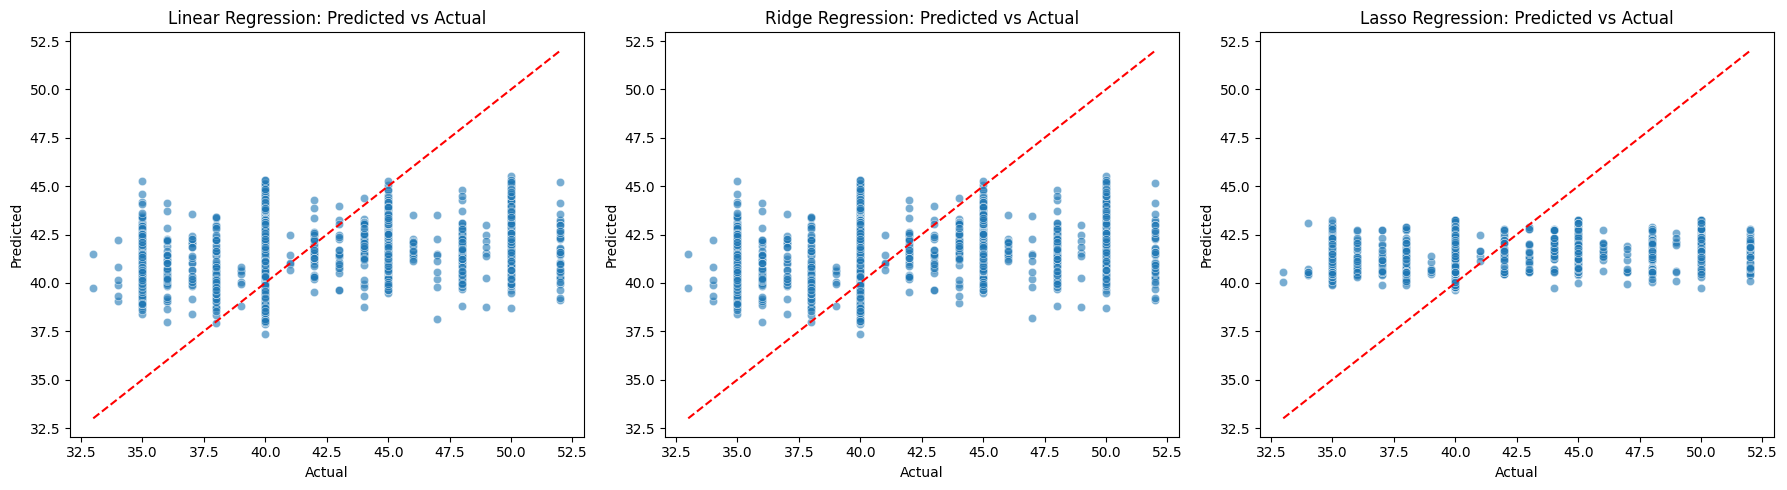

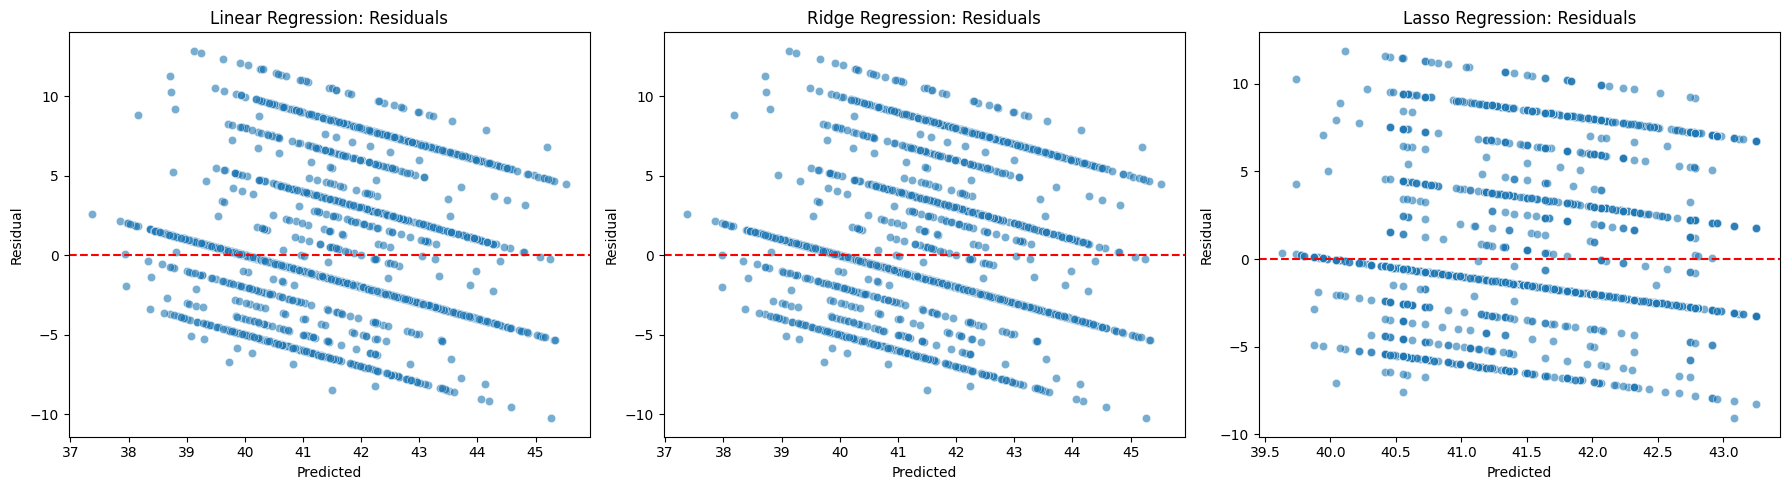

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, predictions.items()):
    sns.scatterplot(x=y_test, y=y_pred, ax=ax, alpha=0.6)
    ax.plot([y.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f"{name}: Predicted vs Actual")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
plt.tight_layout()
plt.show()

# Residual Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, predictions.items()):
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, ax=ax, alpha=0.6)
    ax.axhline(0, linestyle='--', color='red')
    ax.set_title(f"{name}: Residuals")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Residual")
plt.tight_layout()
plt.show()


### Model Prediction and Residual Analysis

- **Actual vs. Predicted scatter plots** show that all three models correctly predict the general trend of working hours, but predictions cluster around 40–45 hours, reflecting the dataset’s skew.
- **Lasso Regression** demonstrates lower variance in predictions due to aggressive feature penalization, leading to noticeable underfitting.
- **Residual plots** for Linear and Ridge suggest potential heteroskedasticity — prediction error increases as working hours increase.
- The horizontal banding of residuals also indicates that many workers report standard hour blocks (e.g., 40 or 45), making exact prediction harder for linear models.
- Overall, **Ridge and Linear Regression** produce tighter predictions and more structured residuals than Lasso, confirming their better fit and generalization observed in earlier metrics.

## Cross-validation to assess model's ability

In [6]:
from sklearn.model_selection import cross_val_score

# Define scorings (negative because sklearn expects a "higher is better" metric)
scoring_metrics = {
    "R2": "r2",
    "MSE": "neg_mean_squared_error",
    "RMSE": "neg_root_mean_squared_error"
}

# Run Cross Validation for each model and each scoring metric
for name, model in models.items():
    print(f"\n{name} Cross-Validation Scores:")
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    for metric_name, scoring in scoring_metrics.items():
        scores = cross_val_score(pipe, x, y, cv=5, scoring=scoring)
        
        # For MSE and RMSE, multiply by -1 to convert from negative scores
        if "neg" in scoring:
            scores = -scores
        
        mean_score = scores.mean()
        print(f"{metric_name} Mean: {mean_score:.4f}")


Linear Regression Cross-Validation Scores:
R2 Mean: 0.0997
MSE Mean: 14.0446
RMSE Mean: 3.7472

Ridge Regression Cross-Validation Scores:
R2 Mean: 0.1001
MSE Mean: 14.0386
RMSE Mean: 3.7464

Lasso Regression Cross-Validation Scores:
R2 Mean: 0.0600
MSE Mean: 14.6646
RMSE Mean: 3.8290


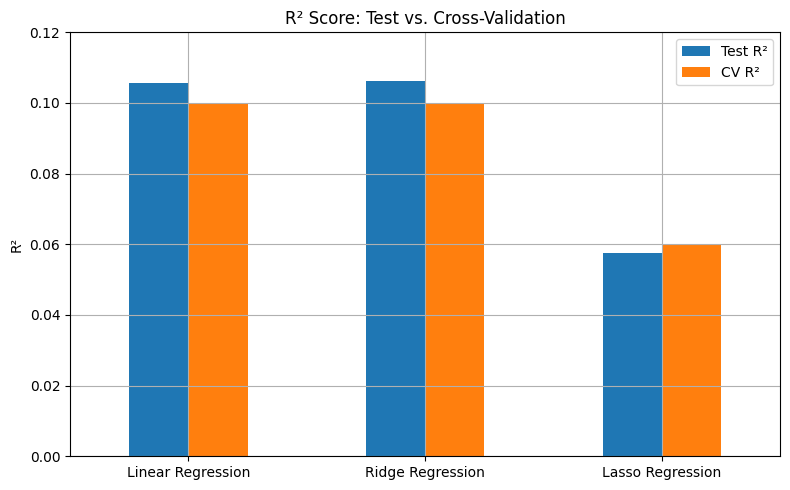

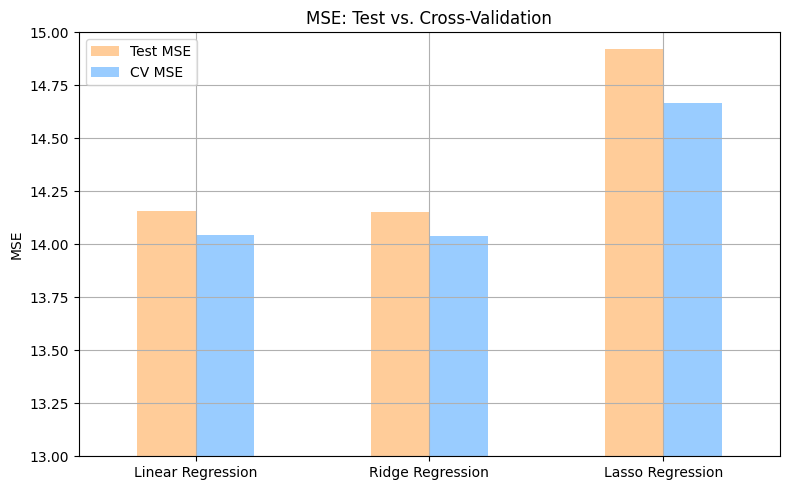

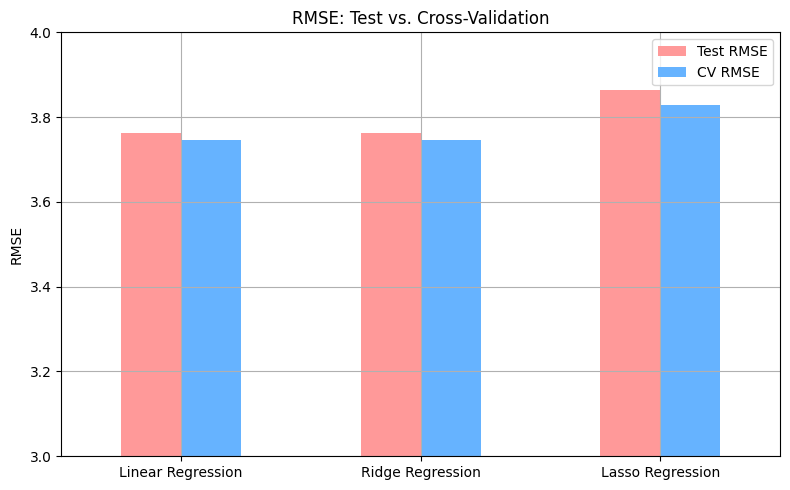

In [7]:
# Define test and CV results manually
comparison_data = {
    "Linear Regression": {
        "Test R²": 0.1057, "CV R²": 0.0997,
        "Test MSE": 14.1585, "CV MSE": 14.0446,
        "Test RMSE": 3.7628, "CV RMSE": 3.7472
    },
    "Ridge Regression": {
        "Test R²": 0.1061, "CV R²": 0.1001,
        "Test MSE": 14.1523, "CV MSE": 14.0386,
        "Test RMSE": 3.7620, "CV RMSE": 3.7464
    },
    "Lasso Regression": {
        "Test R²": 0.0574, "CV R²": 0.0600,
        "Test MSE": 14.9234, "CV MSE": 14.6646,
        "Test RMSE": 3.8631, "CV RMSE": 3.8290
    }
}

# Convert to DataFrame
df_compare = pd.DataFrame(comparison_data).T

# Plot R² comparison
df_compare[["Test R²", "CV R²"]].plot(kind="bar", figsize=(8, 5))
plt.title("R² Score: Test vs. Cross-Validation")
plt.xticks(rotation=0)
plt.ylabel("R²")
plt.ylim(0, 0.12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot MSE comparison
df_compare[["Test MSE", "CV MSE"]].plot(kind="bar", figsize=(8, 5), color=["#ffcc99", "#99ccff"])
plt.title("MSE: Test vs. Cross-Validation")
plt.xticks(rotation=0)
plt.ylabel("MSE")
plt.ylim(13, 15)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot RMSE comparison
df_compare[["Test RMSE", "CV RMSE"]].plot(kind="bar", figsize=(8, 5), color=["#ff9999", "#66b3ff"])
plt.title("RMSE: Test vs. Cross-Validation")
plt.xticks(rotation=0)
plt.ylabel("RMSE")
plt.ylim(3, 4)
plt.grid(True)
plt.tight_layout()
plt.show()

The bar charts above clearly show the consistency between test set and cross-validation metrics. 
Ridge Regression shows the most stable performance across all metrics, followed closely by Linear Regression. 
Lasso Regression exhibits both higher error and lower explanatory power, confirming its weaker suitability for this prediction task.

### Cross-Validation Summary

- Each model was evaluated using 5-fold cross-validation for R², MSE, and RMSE.
- Negative metrics were converted back to their positive form for interpretability.
- This provided a consistent and fair assessment of each model's generalization capability beyond the test set.

## Conclusion

### Model Evaluation Insights

- **Linear Regression** and **Ridge Regression** performed similarly, achieving R² scores of *0.1057* and *0.1061* respectively, with RMSE values close to *3.76*. This means the models explain approximately 10.5% of the variability in `hours-per-week`.

- **Lasso Regression** underperformed both in R² (*0.0574*) and RMSE (*3.8631*), indicating that it may have penalized useful features too aggressively or dropped important variables during regularization.

- **Cross-Validation Results**:
  - **Ridge Regression** again performed slightly better with a cross-validated R² of *0.1001*, followed closely by **Linear Regression** at *0.0997*.
  - **Lasso Regression** had a lower mean R² (*0.0600*) across folds, confirming its reduced effectiveness.

### Interpretation

- All models showed low R² values, indicating that the selected demographic and socioeconomic features are weak predictors of working hours.
- This is likely due to unobserved or unmeasured factors (e.g., personal preferences, job contracts, employer demands) that heavily influence work hours.
- Regularization techniques (Ridge and Lasso) did not substantially improve model performance, suggesting no major overfitting in the base linear model.
- With RMSE values around *3.76*, predictions are off by approximately 4 hours on average, which is relatively significant given the typical 40-hour work week.